In [25]:
import simulator
import strategy
import get_info
import load_data

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from importlib import reload

PATH_TO_FILE = 'C:\\Users\\artem\.Computer Science\CMF\Projects_HFMM\data\md\\btcusdt_Binance_LinearPerpetual\\'
NROWS = 1_000_000

In [26]:
reload(simulator)
reload(strategy)
reload(get_info)
reload(load_data)

<module 'load_data' from 'C:\\Users\\artem\\.Computer Science\\CMF\\Projects_HFMM\\HW_5\\Strat_Future\\load_data.py'>

In [27]:
md = load_data.load_md_from_file(path=PATH_TO_FILE, nrows=NROWS)

In [28]:
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

sim = simulator.Sim(md, latency, md_latency)

In [29]:
#delay between orders
delay = pd.Timedelta(0.1, 's').delta

hold_time = pd.Timedelta(10, 's').delta

strat = strategy.BestPosStrategy(delay, 0.1, hold_time)

In [30]:
%time trades_list, md_list, updates_list, all_orders = strat.run(sim)

KeyError: 1655942402624789714

In [31]:
%time df = get_info.get_pnl(updates_list)

NameError: name 'updates_list' is not defined

In [32]:
df

,receive_ts,exchange_ts,btcusdt:Binance:LinearPerpetual_ask_price_0,btcusdt:Binance:LinearPerpetual_ask_vol_0,btcusdt:Binance:LinearPerpetual_bid_price_0,btcusdt:Binance:LinearPerpetual_bid_vol_0,btcusdt:Binance:LinearPerpetual_ask_price_1,btcusdt:Binance:LinearPerpetual_ask_vol_1,btcusdt:Binance:LinearPerpetual_bid_price_1,btcusdt:Binance:LinearPerpetual_bid_vol_1,...,btcusdt:Binance:LinearPerpetual_bid_price_7,btcusdt:Binance:LinearPerpetual_bid_vol_7,btcusdt:Binance:LinearPerpetual_ask_price_8,btcusdt:Binance:LinearPerpetual_ask_vol_8,btcusdt:Binance:LinearPerpetual_bid_price_8,btcusdt:Binance:LinearPerpetual_bid_vol_8,btcusdt:Binance:LinearPerpetual_ask_price_9,btcusdt:Binance:LinearPerpetual_ask_vol_9,btcusdt:Binance:LinearPerpetual_bid_price_9,btcusdt:Binance:LinearPerpetual_bid_vol_9
0,1655942402250125991,1655942402249000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19976.7,0.066,...,19975.7,4.455,19980.1,0.01,19975.6,1.529,19980.2,0.010,19975.4,1.641
1,1655942402657844605,1655942402655000000,19977.5,0.078,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
2,1655942403346968722,1655942403346000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
3,1655942404080791047,1655942404080000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
4,1655942404452706766,1655942404452000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541351,1656028781390653694,1656028781390000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.5,0.55,21087.1,0.232,21092.6,0.001,21087.0,2.484
2541352,1656028781423672729,1656028781423000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484
2541353,1656028781457683317,1656028781457000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484
2541354,1656028781492806433,1656028781492000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484


In [33]:
dt = pd.to_datetime(df.receive_ts)

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BestStrategy PnL", fontsize=15)
plt.grid()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'total'

<Figure size 1000x500 with 0 Axes>

In [14]:
from simulator import Sim
from strategy import BestPosStrategy
from get_info import get_pnl
from load_data import merge_books_and_trades


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
from simulator import MdUpdate, OrderbookSnapshotUpdate, AnonTrade

from get_info import md_to_dataframe, trade_to_dataframe

In [12]:
def generate_sample_data_1(n_points):
    '''
        this function generates market data with constant mid price and occasional trades
    '''
    mid_price = 100.0
    spread = 2.0
    bid_price = mid_price - spread / 2
    ask_price = mid_price + spread / 2
    size = 1
    
    books = [OrderbookSnapshotUpdate(2 * i, 2 * i, [(ask_price, size)], [(bid_price, size)]) for i in range(1) ]
    
    trades = []
    p = 0.25
    trade_id = np.random.choice([0, 1], size=n_points, p=[1-p, p])
    trade_id = [i % 5 == 0 for i in range(n_points)]
    for i in range(n_points):
        
        if trade_id[i]:
            
            side = np.random.choice([0, 1], size=1)[0]
            price = bid_price if side else ask_price
            side = "ASK" if side else "BID" 
            trade = AnonTrade(2 * i + 1, 2 * i + 1, side, size, price)
            trades.append(trade)

    return books, trades

In [13]:
def generate_sample_data_2(n_points):
    '''
        this function generates market data with lineary increasing mid price and 
        limit orders at the same distance from the mid price
    '''   
    mid_price = 100.0
    spread = 2.0
    bid_price = mid_price - spread / 2
    ask_price = mid_price + spread / 2
    size = 1
    
    books = []
    
    
    trades = []
    p = 0.5
    for i in range(n_points):
        
        bid_price = mid_price - spread / 2
        ask_price = mid_price + spread / 2
        
        book = OrderbookSnapshotUpdate(i, i, [(ask_price, size)], [(bid_price, size)])
        books.append( book  )
        mid_price += 1
    return books, trades

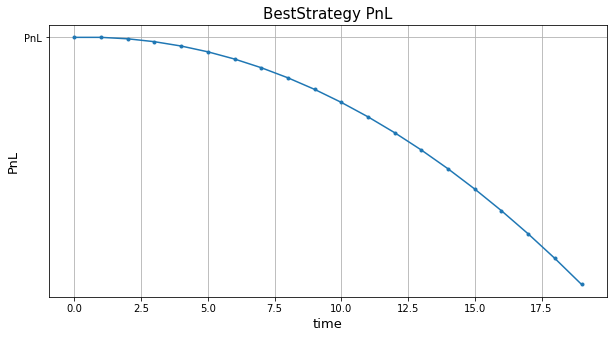

In [14]:
books, anon_trades = generate_sample_data_2(20)

md = merge_books_and_trades(books, anon_trades)

latency = pd.Timedelta(0, 'ns').delta
md_latency = pd.Timedelta(0, 'ns').delta
sim = Sim(md, latency, md_latency)

#delay between orders
delay = pd.Timedelta(1, 'ns').delta
hold_time = pd.Timedelta(1000, 'ns').delta
strategy = BestPosStrategy(delay, hold_time)

own_trades, md_list, updates_list, all_orders = strategy.run(sim)

df_info = get_pnl(updates_list)
t = df_info.receive_ts.values

plt.figure(figsize=(10, 5))
plt.plot(t, df_info.total, '.-', 'PnL')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)

plt.title("BestStrategy PnL", fontsize=15)
plt.grid()
plt.show()

In [15]:
updates_list

[MdUpdate(exchange_ts=0, receive_ts=0, orderbook=OrderbookSnapshotUpdate(exchange_ts=0, receive_ts=0, asks=[(101.0, 1)], bids=[(99.0, 1)]), trade=None),
 MdUpdate(exchange_ts=1, receive_ts=1, orderbook=OrderbookSnapshotUpdate(exchange_ts=1, receive_ts=1, asks=[(102.0, 1)], bids=[(100.0, 1)]), trade=None),
 MdUpdate(exchange_ts=2, receive_ts=2, orderbook=OrderbookSnapshotUpdate(exchange_ts=2, receive_ts=2, asks=[(103.0, 1)], bids=[(101.0, 1)]), trade=None),
 OwnTrade(place_ts=0, exchange_ts=2, receive_ts=2, trade_id=0, order_id=1, side='ASK', size=0.001, price=101.0, execute='BOOK'),
 MdUpdate(exchange_ts=3, receive_ts=3, orderbook=OrderbookSnapshotUpdate(exchange_ts=3, receive_ts=3, asks=[(104.0, 1)], bids=[(102.0, 1)]), trade=None),
 OwnTrade(place_ts=1, exchange_ts=3, receive_ts=3, trade_id=1, order_id=3, side='ASK', size=0.001, price=102.0, execute='BOOK'),
 MdUpdate(exchange_ts=4, receive_ts=4, orderbook=OrderbookSnapshotUpdate(exchange_ts=4, receive_ts=4, asks=[(105.0, 1)], bids=[

In [16]:
all_orders

[Order(place_ts=0, exchange_ts=0, order_id=0, side='BID', size=0.001, price=99.0),
 Order(place_ts=0, exchange_ts=0, order_id=1, side='ASK', size=0.001, price=101.0),
 Order(place_ts=1, exchange_ts=1, order_id=2, side='BID', size=0.001, price=100.0),
 Order(place_ts=1, exchange_ts=1, order_id=3, side='ASK', size=0.001, price=102.0),
 Order(place_ts=2, exchange_ts=2, order_id=4, side='BID', size=0.001, price=101.0),
 Order(place_ts=2, exchange_ts=2, order_id=5, side='ASK', size=0.001, price=103.0),
 Order(place_ts=3, exchange_ts=3, order_id=6, side='BID', size=0.001, price=102.0),
 Order(place_ts=3, exchange_ts=3, order_id=7, side='ASK', size=0.001, price=104.0),
 Order(place_ts=4, exchange_ts=4, order_id=8, side='BID', size=0.001, price=103.0),
 Order(place_ts=4, exchange_ts=4, order_id=9, side='ASK', size=0.001, price=105.0),
 Order(place_ts=5, exchange_ts=5, order_id=10, side='BID', size=0.001, price=104.0),
 Order(place_ts=5, exchange_ts=5, order_id=11, side='ASK', size=0.001, price

In [17]:
sim.ready_to_execute_orders

{0: Order(place_ts=0, exchange_ts=0, order_id=0, side='BID', size=0.001, price=99.0),
 2: Order(place_ts=1, exchange_ts=1, order_id=2, side='BID', size=0.001, price=100.0),
 4: Order(place_ts=2, exchange_ts=2, order_id=4, side='BID', size=0.001, price=101.0),
 6: Order(place_ts=3, exchange_ts=3, order_id=6, side='BID', size=0.001, price=102.0),
 8: Order(place_ts=4, exchange_ts=4, order_id=8, side='BID', size=0.001, price=103.0),
 10: Order(place_ts=5, exchange_ts=5, order_id=10, side='BID', size=0.001, price=104.0),
 12: Order(place_ts=6, exchange_ts=6, order_id=12, side='BID', size=0.001, price=105.0),
 14: Order(place_ts=7, exchange_ts=7, order_id=14, side='BID', size=0.001, price=106.0),
 16: Order(place_ts=8, exchange_ts=8, order_id=16, side='BID', size=0.001, price=107.0),
 18: Order(place_ts=9, exchange_ts=9, order_id=18, side='BID', size=0.001, price=108.0),
 20: Order(place_ts=10, exchange_ts=10, order_id=20, side='BID', size=0.001, price=109.0),
 22: Order(place_ts=11, exchan